# <center>Quantitative Risk Management</center>

## <center>Homework for Week 3</center>
### <center>John Dodson</center>
### <center>September 27, 2021</center>


### Student: Wei Quan
#### ID: 	5631113

In [1]:
using YahooFinance
using Printf
using Plots
using TimeSeries
import Statistics
include("Fall3case.jl")

Main.Fall3case

In [2]:
q = get_symbols("QQQ", "2019-01-01", "2021-09-24")

688×6 TimeArray{Any, 2, Date, Matrix{Any}} 2019-01-02 to 2021-09-23
│            │ Open   │ High   │ Low    │ Close  │ Volume   │ Adjusted │
├────────────┼────────┼────────┼────────┼────────┼──────────┼──────────┤
│ 2019-01-02 │ 150.99 │ 155.75 │ 150.88 │ 154.88 │ 58576700 │ 152.2063 │
│ 2019-01-03 │ 152.6  │ 153.26 │ 149.49 │ 149.82 │ 74820200 │ 147.2336 │
│ 2019-01-04 │ 152.34 │ 157.0  │ 151.74 │ 156.23 │ 74709300 │ 153.533  │
│ 2019-01-07 │ 156.62 │ 158.86 │ 156.11 │ 158.09 │ 52059300 │ 155.3608 │
│ 2019-01-08 │ 159.54 │ 160.11 │ 157.2  │ 159.52 │ 49388700 │ 156.7662 │
│ 2019-01-09 │ 160.14 │ 161.52 │ 159.47 │ 160.82 │ 46491700 │ 158.0437 │
│ 2019-01-10 │ 159.6  │ 161.37 │ 158.7  │ 161.28 │ 38943400 │ 158.4958 │
│ 2019-01-11 │ 160.33 │ 160.86 │ 159.79 │ 160.69 │ 30176600 │ 157.916  │
│ 2019-01-14 │ 159.33 │ 159.96 │ 158.59 │ 159.27 │ 30710200 │ 156.5205 │
│ 2019-01-15 │ 160.0  │ 162.6  │ 159.91 │ 162.38 │ 40874200 │ 159.5768 │
│ 2019-01-16 │ 162.65 │ 163.78 │ 162.29 │ 162.35 │ 33812

In [3]:
q500 = q["Adjusted"][189:end]

500×1 TimeArray{Any, 1, Date, Vector{Any}} 2019-10-01 to 2021-09-23
│            │ Adjusted │
├────────────┼──────────┤
│ 2019-10-01 │ 185.1523 │
│ 2019-10-02 │ 181.9687 │
│ 2019-10-03 │ 183.9659 │
│ 2019-10-04 │ 186.6749 │
│ 2019-10-07 │ 186.1114 │
│ 2019-10-08 │ 183.3232 │
│ 2019-10-09 │ 185.1128 │
│ 2019-10-10 │ 186.5464 │
│ 2019-10-11 │ 188.9489 │
│ 2019-10-14 │ 188.9291 │
│ 2019-10-15 │ 191.3317 │
│ 2019-10-16 │ 190.8571 │
   ⋮
│ 2021-09-09 │ 379.0497 │
│ 2021-09-10 │ 376.1729 │
│ 2021-09-13 │ 375.9132 │
│ 2021-09-14 │ 374.8444 │
│ 2021-09-15 │ 377.6313 │
│ 2021-09-16 │ 377.891  │
│ 2021-09-17 │ 373.416  │
│ 2021-09-20 │ 365.7    │
│ 2021-09-21 │ 366.15   │
│ 2021-09-22 │ 369.57   │
│ 2021-09-23 │ 372.98   │

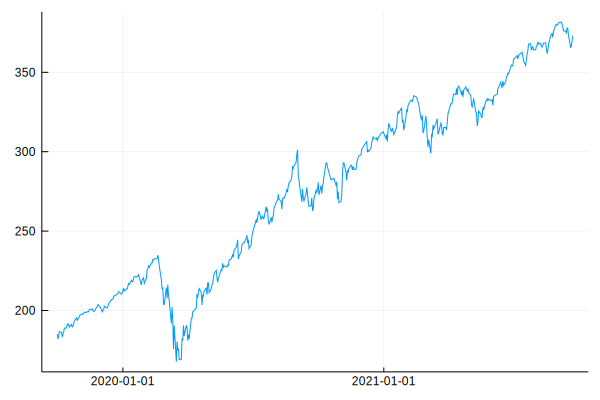

In [4]:
plot(q500, legend = false)

In [5]:
x = diff(log.(values(q500.Adjusted)))

μ = 0
ε = x.-(μ)
θ = Fall3case.garch_fit(ε)

(α₀, α₁, β₁) = θ
σ² = α₀ / (1-α₁-β₁)
@printf("Q1 solution: \n")
@printf("model parameters: \n α₀ is %.8f\n α₁ is %.4f\n β₁ is %.4f\n", 
    α₀, α₁, β₁)
@printf("Unconditional variance is %.8f\n", σ²)

Q1 solution: 
model parameters: 
 α₀ is 0.00000709
 α₁ is 0.1931
 β₁ is 0.7797
Unconditional variance is 0.00026028


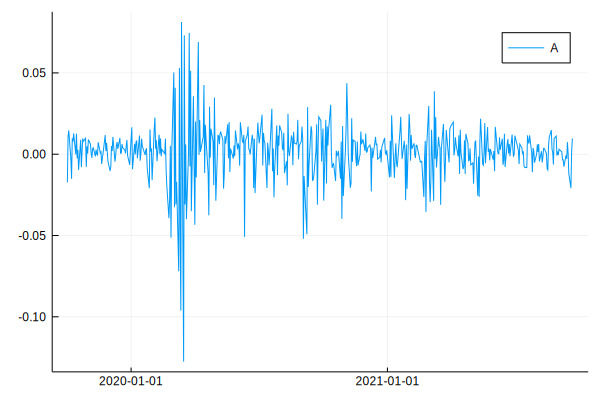

In [6]:
dtseries = timestamp(q500.Adjusted)[2:end]
ta = TimeArray(dtseries,ε)
plot(ta)

In [7]:
#conditional variance
σ²ₜ = Fall3case.garch(ε,θ)
ta_σ²ₜ = TimeArray(dtseries,σ²ₜ)
#plot(ta_sigma_sq, legend = true)
#vline_data = TimeArray([Date(2020,3,17)],[0.006])
#plot!(vline_data, seriestype="vline")

499×1 TimeArray{Float64, 1, Date, Vector{Float64}} 2019-10-02 to 2021-09-23
│            │ A      │
├────────────┼────────┤
│ 2019-10-02 │ 0.0003 │
│ 2019-10-03 │ 0.0003 │
│ 2019-10-04 │ 0.0002 │
│ 2019-10-07 │ 0.0002 │
│ 2019-10-08 │ 0.0002 │
│ 2019-10-09 │ 0.0002 │
│ 2019-10-10 │ 0.0002 │
│ 2019-10-11 │ 0.0002 │
│ 2019-10-14 │ 0.0002 │
│ 2019-10-15 │ 0.0001 │
│ 2019-10-16 │ 0.0001 │
│ 2019-10-17 │ 0.0001 │
   ⋮
│ 2021-09-09 │ 0.0001 │
│ 2021-09-10 │ 0.0    │
│ 2021-09-13 │ 0.0001 │
│ 2021-09-14 │ 0.0001 │
│ 2021-09-15 │ 0.0    │
│ 2021-09-16 │ 0.0001 │
│ 2021-09-17 │ 0.0001 │
│ 2021-09-20 │ 0.0001 │
│ 2021-09-21 │ 0.0001 │
│ 2021-09-22 │ 0.0001 │
│ 2021-09-23 │ 0.0001 │

Conditional Variance

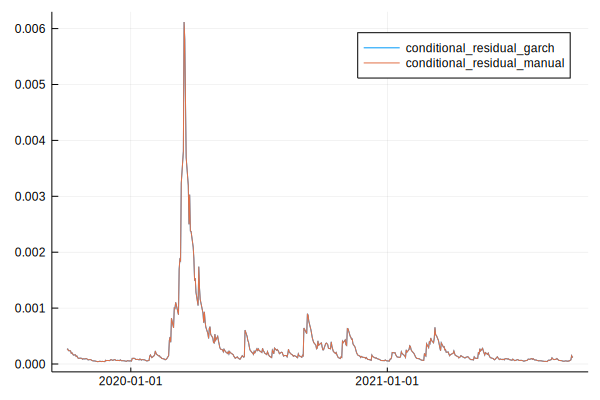

In [8]:
#plot(abs.(x))
#calculate conditional variance manually
σ²ₜ2 = zeros(length(x))
σ²ₜ2[1] = σ²
for i = 2:length(x)  
    σ²ₜ2[i] = α₀ + α₁*ε[i-1]^2 + β₁*σ²ₜ2[i-1]
end

data = (datetime = dtseries, 
        conditional_residual_garch = σ²ₜ,
        conditional_residual_manual = σ²ₜ2)
ta_comp = TimeArray(data; timestamp=:datetime, meta="cond var")
@printf("Conditional Variance")
plot(ta_comp)

Q2 solution: 
largest conditional variance is 0.0061 at [Date("2020-03-17")]
smallest conditional variance is 0.000041542 at [Date("2019-11-15")]

Conditional Variance

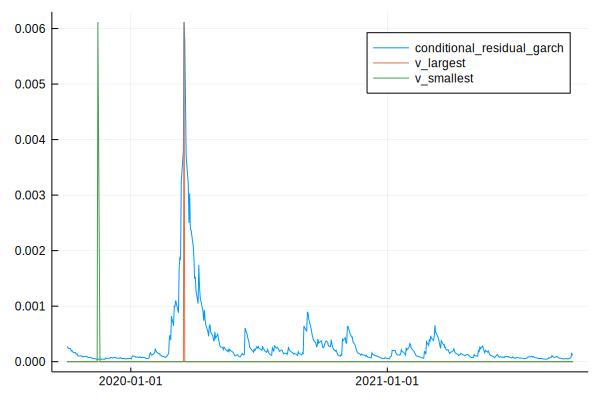

In [9]:
using Printf
dt_max_ind = findmax(σ²ₜ)
dt_min_ind = findmin(σ²ₜ)
@printf("Q2 solution: \n")
@printf("largest conditional variance is %.4f at %s\n", dt_max_ind[1], timestamp(ta_σ²ₜ[dt_max_ind[2]]))
@printf("smallest conditional variance is %.9f at %s", dt_min_ind[1], timestamp(ta_σ²ₜ[dt_min_ind[2]])) 

vline_max = zeros(length(σ²ₜ))
vline_max[dt_max_ind[2]] = σ²ₜ[dt_max_ind[2]]
vline_min = zeros(length(σ²ₜ))
vline_min[dt_min_ind[2]] = σ²ₜ[dt_max_ind[2]]
data_cv = (datetime = dtseries, 
        conditional_residual_garch = σ²ₜ,
        v_largest = vline_max,
        v_smallest = vline_min
        )
@printf("\n\nConditional Variance")
plot(TimeArray(data_cv; timestamp=:datetime, meta="cond var"))

In [10]:
#dt_max = timestamp(q500.Adjusted[dt_max_ind[2]])
#q[dt_max]
#from(ta_sigma_sq, Date(2021,3,10))
#findmax(σ²ₜ)
#σ²ₜ[115]
ta_σ²ₜ[115]

1×1 TimeArray{Float64, 1, Date, Vector{Float64}} 2020-03-17 to 2020-03-17
│            │ A      │
├────────────┼────────┤
│ 2020-03-17 │ 0.0061 │

In [18]:
μₜ = Statistics.mean(x)
σₜ = sqrt.(σ²ₜ)

@printf("μₜ: %.6f, conditional var size: %d\n", μₜ, length(σₜ))

#get standardized residuals
ε_sample = (x.-(μₜ))./σₜ

@printf("\nQ3.1 Extract standardized residuals\n")


μₜ: 0.001403, conditional var size: 499

Q3.1 Extract standardized residuals


In [19]:
ε_sample

499-element Vector{Float64}:
 -1.1620535111527737
  0.5809288185407324
  0.8545578851625317
 -0.28890909759009814
 -1.19088204453366
  0.586613396231288
  0.4680684719568805
  0.8997849409815069
 -0.11786480317330998
  0.9677328015612671
 -0.3250926524113693
  0.11286462004817722
 -1.0961792263716288
  ⋮
 -0.6690776781790019
 -0.6785251085607494
 -1.2860467483446933
 -0.278197663554639
 -0.5931112360321604
  0.8603129490879055
 -0.09597776569476603
 -1.8725074847145384
 -2.5917304877732974
 -0.014241905942593962
  0.7103658841830078
  0.7101655139687173

In [20]:
r_mu = Statistics.mean(ε_sample)
r_var = Statistics.var(ε_sample) 

#Jarque-Bera normality test
n = length(ε_sample)
b = (sum(ε_sample.^3)/n) / ((sum(ε_sample.^2)/n)^(3.0/2))
k = (sum(ε_sample.^4)/n) / ((sum(ε_sample.^2)/n)^2)

T=1.0/6*n*(b^2+1.0/4*(k-3)^2)

@printf("\nQ3.2 Apply Jarque-Bera\n")
@printf("Jarque-Bera test: b %.6f, k: %.6f, T: %.2f\n", b, k, T)


Q3.2 Apply Jarque-Bera
Jarque-Bera test: b -0.956015, k: 5.037620, T: 162.34


In [21]:
#
@printf("Q3.3 T is greater 5.991 which means I can reject normality with 95 percent confidence")


Q3.3 T is greater 5.991 which means I can reject normality with 95 percent confidence